# LIBOR futures and forecasting the Fed Funds rate

We examine the spread between two interest rates: LIBOR and Fed Funds. The former has a much greater depth in the futures market in terms of volume and maturity horizon, which implies richer information content. We will seek out their relationship, and then construct a synthetic forward Fed Funds rate. This is useful in gauging market sentiment regarding Fed policy.

The **30-day Federal Funds futures incorporates market expectations of the average *daily* Federal Funds Effective Rate (FFER) levels *during* a given contract month**. The FFER is published by the Federal Reserve Bank of New York each day, and is calculated as a transaction-volume weighted average of the previous day’s rates on trades arranged by major brokers for overnight unsecured loans between depository institutions.

In contrast, the futures on LIBOR (CME Eurodollars contract) has a tenor of 3-months with tremendous trading volume extending out for years. 

Our synthetic forward Fed Funds *estimates* the expected average FFER *during* a given contract month. This is measure is more meaningful than the probability of Fed rate hike currently in vogue, since it is an estimate generated from a highly active futures market curve.

In conclusion, we shall sum up with one number to this simple question: **How much is the Fed Funds expected to change over the next 12 months?**

*Dependencies:*

    - Linux, bash [not critical, generally cross-platform]
    - Python: matplotlib, pandas [recommend Anaconda distribution]
    - Modules: fecon
     
*CHANGE LOG*

    2015-11-02  Include October Fed no-change announcement.
    2015-09-22  Include post-FOMC meeting of 2015-09-17.
    2015-09-16  First version.

In [1]:
#  NOTEBOOK v4 settings and system details:      [00-tpl v4.15.0812]

#  Assume that the backend is LINUX (e.g. Ubuntu running bash shell):
print '\n ::  TIMESTAMP of last notebook execution:'
!date
print ' ::  IPython version:'
!ipython --version

#  Automatically RELOAD modified modules:
%load_ext autoreload
%autoreload 2
#           0 disables autoreload.

#  DISPLAY options
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  MATH display, use %%latex, rather than the following:
#                from IPython.display import Math
#                from IPython.display import Latex
#  Generate PLOTS inside notebook:
%matplotlib inline

import pandas as pd
print ' ::  pandas version:'
print pd.__version__
#      pandas DataFrames are represented as text by default; enable HTML representation:
#      [Deprecated: pd.core.format.set_printoptions( notebook_repr_html=True ) ]
pd.set_option( 'display.notebook_repr_html', False )

print ' ::  Working directory (set as $workd):'
workd, = !pwd
print workd + '\n'


 ::  TIMESTAMP of last notebook execution:
Mon Nov  2 09:49:42 PST 2015
 ::  IPython version:
3.2.1
 ::  pandas version:
0.16.2
 ::  Working directory (set as $workd):
/home/yaya/Dropbox/ipy/fecon235/nb



In [2]:
from fecon import *

In [3]:
#  SET UP the particular (f4) futures contracts of interest:

s_fed    = 'f4fed15z'

s_libor  = 'f4libor15z'
s_libory = 'f4libor16z'

#  f4fed*   refers to the CME/CBOT Fed Funds futures.
#  f4libor* refers to the CME Eurodollar futures.
#  Both should reference the same year and month, 
#  except for s_libory which should be one year further out.

#  RE-RUN this entire study by merely changing the string symbols.

In [4]:
#  Retrieve data:
fed     = todf( 100 - get(s_fed)   )
libor   = todf( 100 - get(s_libor) )
libory  = todf( 100 - get(s_libory) )
#               ^convert futures quotes to conventional % format

In [5]:
#  Let "spread" denote their arithmetic difference:
spread = libor - fed

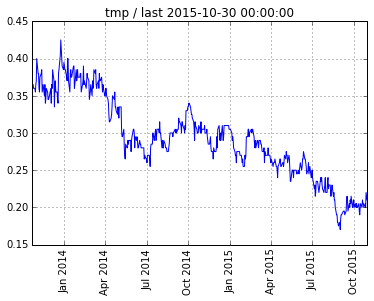

In [6]:
plot( spread )
#  but clearly there is a trend.

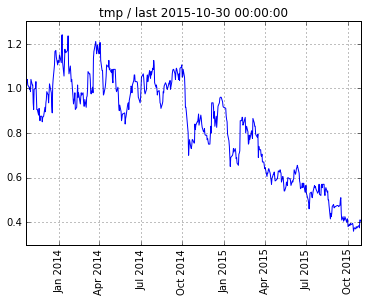

In [7]:
plot( libor )

Note that *spread* and *libor* have similar trends, which we will further use to model the spread.

In [8]:
#  Let "ratio" denote the ratio between spread and libor:
ratio = todf( spread / libor ) 
#  as a way to filter out the trends.

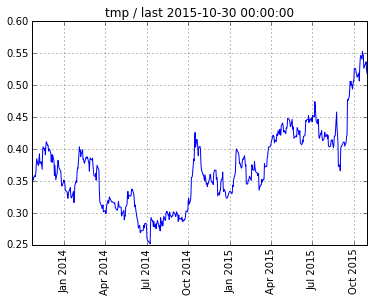

In [9]:
#  Now we have something more stationary:
plot( ratio )

We think that the spread is multiplicatively dependent on the level of libor. The underlying *libor* is an instrument of 90-day duration, whereas *fed* is the average of erratic 30 one-day durations. Thus the average ratio roughly expresses the multplicative relation between 3-month and 1-month rates. That 1-month rate should be within the Federal Reserve's decreed Fed Funds range (see Appendix).

In [10]:
#  Average ratio:
ratio_av = ratio.mean()
print ratio_av

Y    0.370006
dtype: float64


Thus, perhaps in the short-term the relationship between LIBOR and Fed Funds is multiplicative, rather than arithmetic. (The *ratio_av* in the long-term is definitively not constant due to the changing credit worthiness of the primary international banks.) More precisely,

    fed = (1 - ratio_av) * libor

In [11]:
#  So let's create SYNTHETIC Fed Funds:
fedsyn = todf( (1 - ratio_av) * libor )

#  2015-09-16  ratio_av = 0.358
#  2015-11-02  ratio_av = 0.370

In [12]:
#  To validate against the traded Fed Funds futures:
#  stat2( fed[Y], fedsyn[Y] )

In [13]:
#  Estimation error:
#  stats( fed - fedsyn )

2015-09-14  Correlation and R-squared are both around 0.98 which is very good. [Uncomment the command to see the printout.]

But we are more concerned about estimation errors: standard deviation of 4.7 bp (as of 2015-09-16) which is not bad for a highly erratic series like Fed Funds (see Appendix). 

Next we will look at the most recent 3-month segment of synthetic Fed Funds.

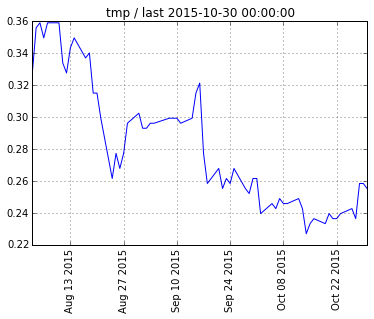

In [14]:
#  Synthetic Fed Funds, last 64 trading days:
plot( tail( fedsyn, 64 ))

2015-09-16  Synthetic Fed Funds for December 2015 is currently sitting at 32 bp (note: that sudden decline in August to 27 bp is associated with the stock crash in China with some spillover to the US equities). Tomorrow is the FOMC decision for September 2015 over which there is great market uncertainty regarding a rate hike. 

2015-09-22  Post-FOMC of 2015-09-17 shows a sharp decline to 26 bp due to no-hike decision, reflecting mild surprise relative to expectations.

2015-11-02  No press conference for October Fed announcement so no major changes were expected, and indeed there was no change in policy regarding fed funds. Fed statement removed its concern about economic developments *abroad* and hinted possible rate hike in December. Synthetic Fed Funds for December 2015 is currently sitting at 25 bp.

## On rate hike probabilities and forecasting

The media is fond of releasing the probability of a rate hike based on Fed Funds futures, however, the assumptions behind the calculation are often dubious given that the Fed currently operates within a range [2015-09-16: zero to 25 bp range since 16 December 2008] rather than a single target rate.

Our synthetic forward Fed Funds has estimated the expected average FFER (Fed Funds Effective Rate) *during* the initialized contract month. Rather than prob(rate_hike), we will apply our estimated parameter on the LIBOR futures one year out from the initial month.

In [15]:
#  Let's estimate Fed Funds 1-year out:
fedy = todf( (1 - ratio_av) * libory )

#  Note how we substitute libory in place of libor.

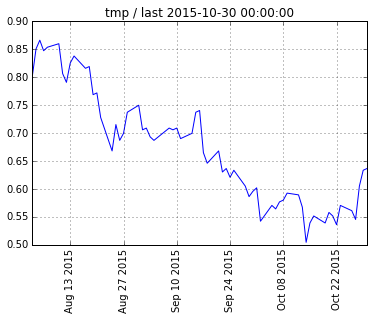

In [16]:
plot( tail( fedy, 64) )

## CONCLUSION: point forecast for Fed Funds

We have wrangled lots of data, but let's sum up with one number to this simple question: **How much is the Fed Funds expected to change over the next 12 months?**

In [17]:
#  Taking this difference minimizes the effects of the yield curve:
tailvalue( fedy ) - tailvalue( fedsyn )

#  2015-09-16  Answer: +43 bp from current 14 bp effective rate (see Appendix), 
#                             so FFER est. at 0.57% in one year.
#
#  2015-09-22  Answer: +38 bp from current 14 bp effective rate,
#                             so FFER est. at 0.52% in one year.
#
#  2015-11-02  Answer: +38 bp from current 12 bp effective rate,
#                             so FFER est. at 0.50% in one year.


0.38114610873293214

2015-09-22  Currently our **point forecast for FFER one-year out is 0.52%**. Given our standard error computed above, this implies in terms of expected Fed action: one rate hike of 25 bp (keeping actual in the upper range) or two rate hikes of 25 bp (keeping actual in the lower [0.50, 0.75] range).

2015-11-02  **Point forecast for FFER one-year out is 0.50%**, thus no change in conclusion is warranted.

## Appendix: FFER, Fed Funds Effective Rate

Here we cover the actual Fed Funds rate (not the futures).

In [18]:
#  The data source is the Federal Reserve Bank of St. Louis:
ffer = getfred( 'DFF')
#               ^Daily frequency

In [19]:
#  To see the raw FFER over the last year:
#  plot( tail( ffer, 256 ))

In [20]:
#  FFER is so notoriously erratic, 
#  we shall apply a double Holt-Winters filter:
ffer = tail( ffer, 2560 )
#                  ^for last ten years, back to 1954 unnecessary.
ffer_holt = holtlevel( holtlevel( ffer ))

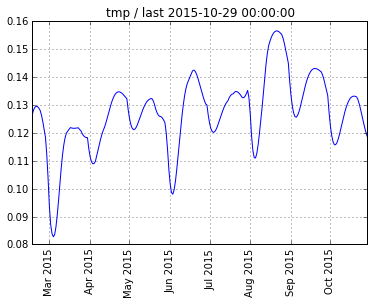

In [21]:
plot( tail(ffer_holt, 256))

2015-09-16  We can safely say that FFER has been trading around mid-range [0, 0.25] for the last year.

2015-11-02  FFER estimated at 12 bp currently.

Note that the *overnight* FFER will have very little bearing on futures pricing because the Federal Reserve uses open market operations influencing the money supply to force FFER within their *currently* stated policy range.  